# Data visualization and modification

In first I import the libraries needed for this task and create a data frame

In [1]:
import pandas as pd
import seaborn as sns
from collections import Counter

In [2]:
df = pd.DataFrame({
    "Name": ["Kacper","Janek","Jagoda","Piotr","Wiesław","Asia", "Adam", "Marek", "Kasia","Ewa"],
    "Score":[87,40,26,90,79,66,71,55,97,33],
    "Rating": [4,2,2,5,4,3,4,3,5,2]
})

Now I will present the data, below there is a bar graph showing the number of points scored and the appropriate color of the obtained rating

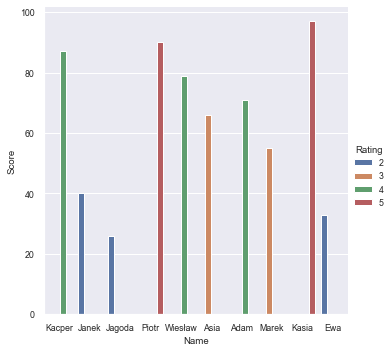

In [3]:
sns.set(font_scale = 0.8)
chart = sns.catplot(data=df, x = "Name", y = "Score", kind = "bar", hue ="Rating" )

We can also show the obtained ratings in this way

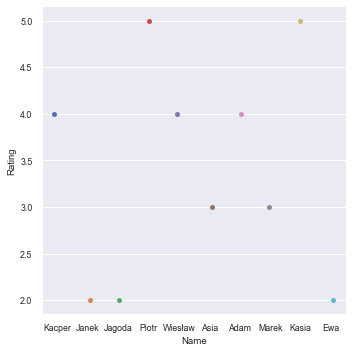

In [4]:
wykres = sns.catplot(data=df, x = "Name", y = "Rating")


Now I will check how many people have passed the exam.

In [5]:
df["passed"] = "No"
df.loc[df.Rating > 2, "passed"] = "Yes"

In [6]:
Counter(df.passed)

Counter({'Yes': 7, 'No': 3})


I will now modify the dataframe a bit, adding grades from other exams and removing the redundant column containing the number of points

In [7]:
df = df.rename(columns={'Rating':'first_exam'})

In [8]:
df.drop(['Score','passed'], axis=1, inplace=True)

In [9]:
second_exam = [3,2,4,4,4,3,2,2,5,3]
third_exam = [5,4,3,2,2,4,4,3,3,4]
fourth_exam = [2,3,4,5,4,3,2,3,3,2]

In [10]:
df["second_exam"] = second_exam
df["third_exam"] = third_exam
df["fourth_exam"] = fourth_exam

I will calculate the grade average for all the exams

In [11]:
amount = df.first_exam + df.second_exam + df.third_exam +  df.fourth_exam
amount /= 4

In [12]:
df["mean"] = amount

In [13]:
df["passed"] = "No"
df.loc[amount > 2.75, "passed"] = "Yes"

Finally, it sorts the tables with the highest rating averages on top and shows this in the bar chart.

In [14]:
df.sort_values(by=["mean"],inplace=True, ascending = False)
df.reset_index(drop=True,inplace=True)
df.head(10)

,Name,first_exam,second_exam,third_exam,fourth_exam,mean,passed
0,Piotr,5,4,2,5,4.00,Yes
1,Kasia,5,5,3,3,4.00,Yes
2,Kacper,4,3,5,2,3.50,Yes
3,Wiesław,4,4,2,4,3.50,Yes
4,Jagoda,2,4,3,4,3.25,Yes
5,Asia,3,3,4,3,3.25,Yes
6,Adam,4,2,4,2,3.00,Yes
7,Janek,2,2,4,3,2.75,No
8,Marek,3,2,3,3,2.75,No
9,Ewa,2,3,4,2,2.75,No


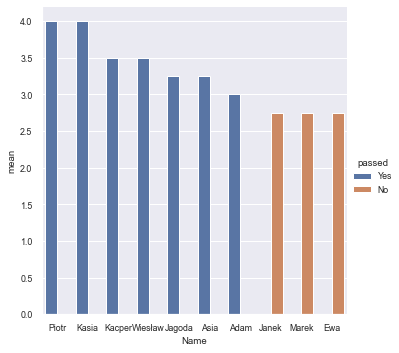

In [15]:
chart = sns.catplot(data=df, x = "Name", y = "mean",kind = "bar", hue ="passed")